<a href="https://colab.research.google.com/github/promaxsysaditya/msme-demo/blob/main/MSME_DEMO_90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from xgboost import plot_tree
%matplotlib inline
warnings.filterwarnings('ignore')

In [93]:
df_train = pd.read_csv("/kaggle/input/rossmann-store-sales/train.csv")
df_test = pd.read_csv("/kaggle/input/rossmann-store-sales/test.csv")
df_store = pd.read_csv("/kaggle/input/rossmann-store-sales/store.csv")

In [94]:
df_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [95]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [96]:
df = pd.merge(df_train, df_store, on='Store')

In [97]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [99]:
df.shape

(1017209, 18)

In [100]:
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [101]:
df["CompetitionDistance"].fillna(df["CompetitionDistance"].median(),inplace=True)

In [102]:
df.isnull().sum()

,0
Store,0
DayOfWeek,0
Date,0
Sales,0
Customers,0
Open,0
Promo,0
StateHoliday,0
SchoolHoliday,0
StoreType,0


In [103]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df.drop(columns=['Date'], inplace=True)
df.head()

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015


In [104]:
df = df.drop(df[df["Sales"] == 0].index)
df.shape

(844338, 20)

In [105]:
df.drop(["Customers"],axis=1, inplace=True,)
df.head()

,Store,DayOfWeek,Sales,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,5263,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,6064,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,8314,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,13995,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,4822,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015


In [106]:
df.drop(["Open"],axis=1, inplace=True,)
df.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year
0,1,5,5263,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015
1,2,5,6064,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015
2,3,5,8314,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015
3,4,5,13995,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015
4,5,5,4822,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015


In [107]:
df["StateHoliday"].unique()


array(['0', 'a', 'b', 'c', 0], dtype=object)

In [108]:
df["StateHoliday"] = df["StateHoliday"].replace(0, '0')
df["StateHoliday"].unique()

array(['0', 'a', 'b', 'c'], dtype=object)

In [109]:
df['Is_Weekend'] = df['DayOfWeek'].apply(lambda x: 1 if x >= 6 else 0)


In [110]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df['Season'] = df['Month'].apply(get_season)
df.head()

,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Day,Month,Year,Is_Weekend,Season
0,1,5,5263,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN,31,7,2015,0,Summer
1,2,5,6064,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",31,7,2015,0,Summer
2,3,5,8314,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",31,7,2015,0,Summer
3,4,5,13995,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN,31,7,2015,0,Summer
4,5,5,4822,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN,31,7,2015,0,Summer


In [111]:
df = df.sort_values(by=['Store', 'Month', 'Day'])

df['Sales_Lag_1'] = df.groupby('Store')['Sales'].shift(1)

df['Sales_Lag_7'] = df.groupby('Store')['Sales'].shift(7)

df = df.dropna()

In [112]:
df['CompetitionDistance'] = pd.cut(df['CompetitionDistance'],
                               bins=[0, 500, 2000, np.inf],
                               labels=['Near', 'Medium', 'Far'],
                               right=False,
                               include_lowest=True)

In [113]:
cols = [
    # Store characteristics
    'Store', 'StoreType', 'Assortment',

    # Time features
    'DayOfWeek', 'Day', 'Month', 'Is_Weekend', 'Season',

    # Competition features
    'CompetitionDistance',

    # Promotion features
    'Promo', 'Promo2',

    # Status indicators
    'StateHoliday', 'SchoolHoliday',

    # Target variable
    'Sales_Lag_1','Sales_Lag_7','Sales'
]

df = df[cols]
df.head()

,Store,StoreType,Assortment,DayOfWeek,Day,Month,Is_Weekend,Season,CompetitionDistance,Promo,Promo2,StateHoliday,SchoolHoliday,Sales_Lag_1,Sales_Lag_7,Sales
1012751,2,a,a,5,4,1,0,Winter,Medium,0,1,0,1,2760.0,4137.0,4484
230806,2,a,a,1,5,1,0,Winter,Medium,1,1,0,0,4484.0,3759.0,7308
1011636,2,a,a,6,5,1,1,Winter,Medium,0,1,0,0,7308.0,4422.0,2342
229691,2,a,a,2,6,1,0,Winter,Medium,1,1,0,0,2342.0,3132.0,6696
603546,2,a,a,1,6,1,0,Winter,Medium,1,1,0,0,6696.0,4802.0,8317


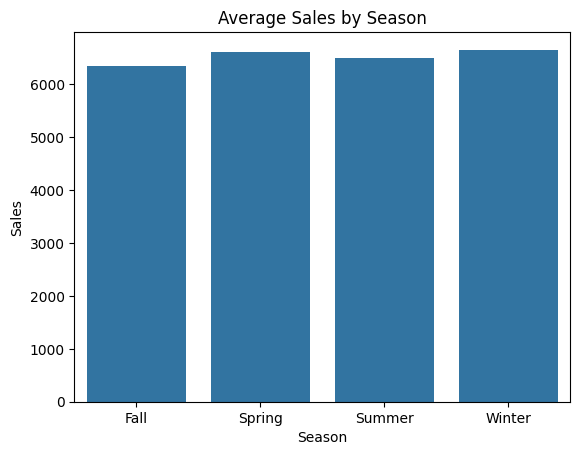

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
# Lets see Which Season has the most sales.
# Calculate average sales by season
season_sales = df.groupby('Season')['Sales'].mean().reset_index()

# Plot
sns.barplot(data=season_sales, x='Season', y='Sales')
plt.title('Average Sales by Season')
plt.savefig('season_sales.png')

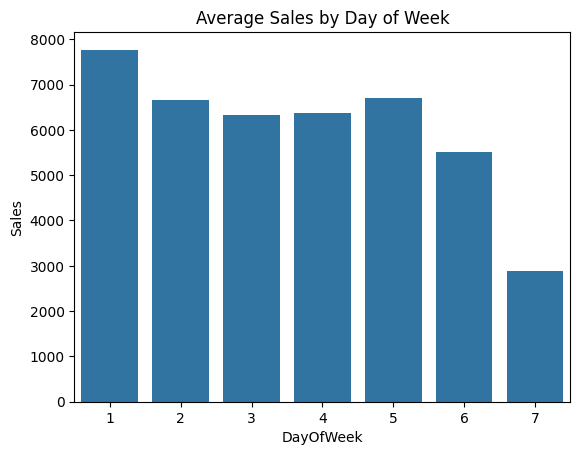

In [115]:
# lets see sales by day of week
# Group by DayOfWeek (1=Mon, 7=Sun)
day_sales = df.groupby('DayOfWeek')['Sales'].mean().reset_index()

sns.barplot(data=day_sales, x='DayOfWeek', y='Sales')
plt.title('Average Sales by Day of Week')
plt.savefig('day_sales.png')

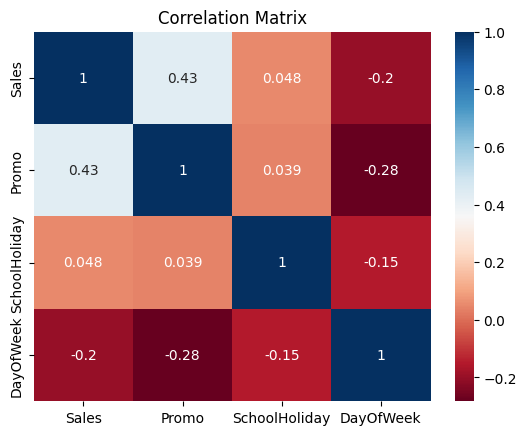

In [116]:
# Select only numeric columns
cols = ['Sales', 'Promo', 'SchoolHoliday', 'DayOfWeek']
corr = df[cols].corr()

# Plot heatmap
sns.heatmap(corr, annot=True, cmap='RdBu')
plt.title('Correlation Matrix')
plt.savefig('correlation.png')

In [117]:
df.head()


,Store,StoreType,Assortment,DayOfWeek,Day,Month,Is_Weekend,Season,CompetitionDistance,Promo,Promo2,StateHoliday,SchoolHoliday,Sales_Lag_1,Sales_Lag_7,Sales
1012751,2,a,a,5,4,1,0,Winter,Medium,0,1,0,1,2760.0,4137.0,4484
230806,2,a,a,1,5,1,0,Winter,Medium,1,1,0,0,4484.0,3759.0,7308
1011636,2,a,a,6,5,1,1,Winter,Medium,0,1,0,0,7308.0,4422.0,2342
229691,2,a,a,2,6,1,0,Winter,Medium,1,1,0,0,2342.0,3132.0,6696
603546,2,a,a,1,6,1,0,Winter,Medium,1,1,0,0,6696.0,4802.0,8317


In [118]:
nominal_cols = ['StoreType', 'Assortment', 'StateHoliday', 'Season']
df = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

In [119]:
store_means = df.groupby('Store')['Sales'].mean()
df['Store_encoded'] = df['Store']
df.drop(['Store'], axis=1, inplace=True)

In [120]:
# Odinal Encoding
# 1. Define the mapping
comp_dist_map = {'Near': 0, 'Medium': 1, 'Far': 2}

# 2. Create the new encoded column by mapping the values
df['CompetitionDistance_encoded'] = df['CompetitionDistance'].map(comp_dist_map)

# 3. Drop the original column
df.drop(['CompetitionDistance'], axis=1, inplace=True)

In [121]:
df.head()
df.shape

(265233, 21)

In [122]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [123]:
X = df.drop(['Sales'], axis=1)
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)
X_train.shape, X_test.shape

((198924, 20), (66309, 20))

In [124]:
X.head()

,DayOfWeek,Day,Month,Is_Weekend,Promo,Promo2,SchoolHoliday,Sales_Lag_1,Sales_Lag_7,StoreType_c,StoreType_d,Assortment_c,StateHoliday_a,StateHoliday_b,StateHoliday_c,Season_Spring,Season_Summer,Season_Winter,Store_encoded,CompetitionDistance_encoded
1012751,5,4,1,0,0,1,1,2760.0,4137.0,False,False,False,False,False,False,False,False,True,2,1
230806,1,5,1,0,1,1,0,4484.0,3759.0,False,False,False,False,False,False,False,False,True,2,1
1011636,6,5,1,1,0,1,0,7308.0,4422.0,False,False,False,False,False,False,False,False,True,2,1
229691,2,6,1,0,1,1,0,2342.0,3132.0,False,False,False,False,False,False,False,False,True,2,1
603546,1,6,1,0,1,1,0,6696.0,4802.0,False,False,False,False,False,False,False,False,True,2,1


In [125]:
y.head()

,Sales
1012751,4484
230806,7308
1011636,2342
229691,6696
603546,8317


In [126]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [127]:
# If the data is truly numerical (distances), convert to float/int
X_train['CompetitionDistance_encoded'] = X_train['CompetitionDistance_encoded'].astype(float)
X_test['CompetitionDistance_encoded'] = X_test['CompetitionDistance_encoded'].astype(float)

XGB = XGBRegressor(random_state=42)
XGB.fit(X_train, y_train)
# Perform Prediction
y_pred = XGB.predict(X_test)
# Evaluate Model
mae, rmse, r2_square = evaluate_model(y_test, y_pred)
print(f'MAE: {mae}\nRMSE: {rmse}\nR2 Square: {r2_square}')

MAE: 797.0650024414062
RMSE: 1099.0145017241584
R2 Square: 0.8343057036399841


In [128]:
GB = GradientBoostingRegressor(random_state=42)
GB.fit(X_train, y_train)
y_pred = GB.predict(X_test)
# Evaluate Model
mae, rmse, r2_square = evaluate_model(y_test, y_pred)
print(f'MAE: {mae}\nRMSE: {rmse}\nR2 Square: {r2_square}')

MAE: 1122.8092085487356
RMSE: 1536.1794029973078
R2 Square: 0.6762688414838711


In [129]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
import time

# 1. OPTIMIZATION: Use 'hist' tree method (much faster for large data)
# and set n_jobs=1 here to avoid fighting with RandomizedSearchCV for CPU cores.
xgb_model = XGBRegressor(
    n_jobs=1,              # Let RandomizedSearchCV handle parallelization
    tree_method='hist',    # <--- HUGE SPEEDUP: Uses histogram binning
    random_state=42
)

xgboost_params = {
    'n_estimators': [100, 300, 500],       # Reduced upper limit (1000 is often overkill for tuning)
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 2]
}

# 2. OPTIMIZATION: Train on a subset (e.g., 20% of data)
# Hyperparameters found on a representative sample usually transfer well to the full dataset.
sample_size = int(len(X_train) * 0.2) # Use 20% of data
X_sample = X_train.sample(sample_size, random_state=42)
y_sample = y_train.loc[X_sample.index]

print(f"Tuning on {sample_size} rows (20% sample) for speed...")

start_time = time.time()

random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgboost_params,
    n_iter=50,             # <--- 50 is usually sufficient to find good params
    scoring='neg_root_mean_squared_error',
    cv=3,
    verbose=1,
    n_jobs=-1,             # <--- Parallelize the SEARCH, not the model
    random_state=42
)

random_search.fit(X_sample, y_sample)

print(f"Time taken: {round((time.time() - start_time)/60, 2)} minutes")
print(f"Best Params: {random_search.best_params_}")

# 3. FINAL STEP: Train the best model on the FULL dataset
best_model = random_search.best_estimator_
best_model.fit(X_train, y_train)

Tuning on 39784 rows (20% sample) for speed...
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Time taken: 3.9 minutes
Best Params: {'subsample': 0.8, 'reg_lambda': 1, 'reg_alpha': 0.1, 'n_estimators': 500, 'min_child_weight': 5, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.3, 'colsample_bytree': 0.8}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=0.3, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=9,
             max_leaves=None, min_child_weight=5, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=1, num_parallel_tree=None, ...)

In [130]:
models = {
    "Xgboost Regressor":XGBRegressor(subsample=0.8, reg_lambda= 1, reg_alpha= 0.1, n_estimators= 500,
                                      min_child_weight= 5, max_depth= 9, learning_rate= 0.1,
                                     gamma= 0.3, colsample_bytree= 0.8,n_jobs=-1)
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')

    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))

    print('='*35)
    print('\n')

Xgboost Regressor
Model performance for Training set
- Root Mean Squared Error: 631.1953
- Mean Absolute Error: 454.4324
- R2 Score: 0.9462
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 868.8719
- Mean Absolute Error: 610.6575
- R2 Score: 0.8964




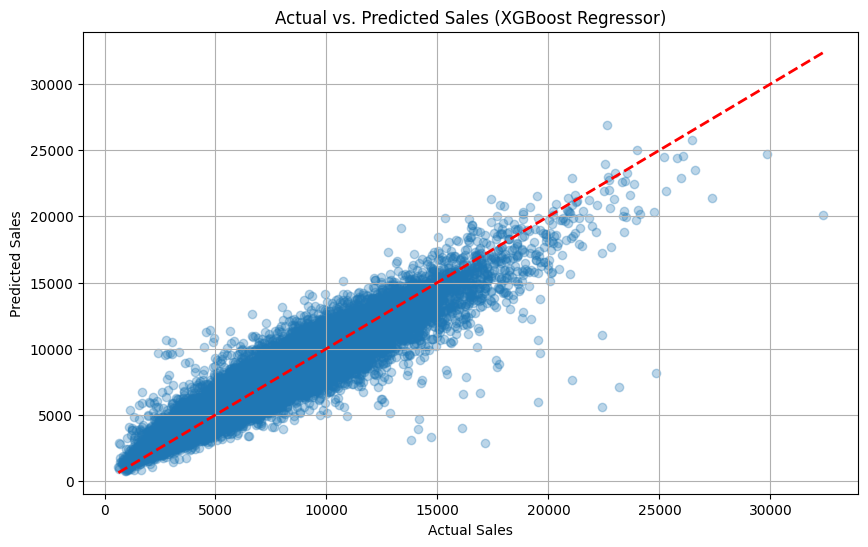

In [131]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.title('Actual vs. Predicted Sales (XGBoost Regressor)')
plt.grid(True)
plt.show()

In [132]:
import pandas as pd

new_data = pd.DataFrame({
    'DayOfWeek': [1],  # Monday
    'Day': [15],
    'Month': [7],  # July
    'Is_Weekend': [0],
    'Promo': [1],
    'Promo2': [0],
    'SchoolHoliday': [0],
    'Sales_Lag_1': [5000.0],
    'Sales_Lag_7': [6000.0],
    'StoreType_c': [False], # Assuming StoreType 'a'
    'StoreType_d': [False], # Assuming StoreType 'a'
    'Assortment_c': [False], # Assuming Assortment 'a'
    'StateHoliday_a': [False], # Assuming StateHoliday '0'
    'StateHoliday_b': [False], # Assuming StateHoliday '0'
    'StateHoliday_c': [False], # Assuming StateHoliday '0'
    'Season_Spring': [False],
    'Season_Summer': [True],  # July is Summer
    'Season_Winter': [False],
    'Store_encoded': [1], # Example Store ID
    'CompetitionDistance_encoded': [1.0] # Medium
})

# Ensure column order matches X_train
new_data = new_data[X_train.columns]

# Make prediction
predicted_sales = best_model.predict(new_data)

print(f"Predicted Sales for the given input: {predicted_sales[0]:.2f}")


Predicted Sales for the given input: 8931.29
